In [1]:
import unibox as ub

Using global temporary directory: /tmp/unibox_temp


## Load tests:

### local:

In [2]:
json_dict = ub.loads("../tests/test_files/sample.json")
ub.saves(json_dict, "local.json")

2025-01-03 22:25:43 [INFO] loads: dict LOADED from "../tests/test_files/sample.json" in 0.00 seconds
2025-01-03 22:25:43 [INFO] saves: dict saved successfully to "local.json" in 0.00 seconds


2025-01-03 22:25:43 [INFO] loads: JpegImageFile LOADED from "../tests/test_files/sample.jpg" in 0.01 seconds


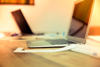

In [3]:
img = ub.loads("../tests/test_files/sample.jpg")
img.thumbnail((100, 100))
img

In [4]:
ub.saves(img, "local.jpg")

2025-01-03 22:25:43 [INFO] saves: JpegImageFile saved successfully to "local.jpg" in 0.00 seconds


### huggingface:

In [2]:
import unibox as ub
hf_dset = ub.loads("hf://incantor/aesthetic_eagle_5category_iter99")

2025-01-04 01:11:12 [INFO] loads: Dataset LOADED from "hf://incantor/aesthetic_eagle_5category_iter99" in 1.97 seconds


In [3]:
test_df = hf_dset.to_pandas().head()
test_df

filename    size tags          folders  \
0  1499364669504786436_1_resized.webp  321060   []  [LYPYMJJ3VYBIN]   
1          image_4419749_resized.webp  133108   []  [LYPYMJJ3VYBIN]   
2          image_4418472_resized.webp  200260   []  [LYPYMJJ3VYBIN]   
3          image_4420914_resized.webp  222084   []  [LYPYMJJ3VYBIN]   
4          image_4420811_resized.webp  355796   []  [LYPYMJJ3VYBIN]   

   isDeleted url annotation  star  width  height palette_color  palette_ratio  \
0      False                  2.0   1024    1462       #efded7             69   
1      False                  3.0    960    1358       #fbfaf9             52   
2      False                  3.0   1056    1195       #faf8f8             70   
3      False                  3.0    768    1596       #e6e6e5             70   
4      False                  1.0   1056    1188       #e2e0e0             37   

  animated  resolutionWidth  resolutionHeight  duration  \
0     None              NaN               NaN       NaN   
1     None              NaN               NaN       NaN   
2     None              NaN               NaN       NaN   
3     None              NaN               NaN       NaN   
4     None              NaN               NaN       NaN   

                                              s3_uri  score_rating  \
0  s3://dataset-ingested/resized_1572864/14993646...             1   
1  s3://unidataset-danbooru/resized_1310720/image...             2   
2  s3://unidataset-danbooru/resized_1310720/image...             2   
3  s3://unidataset-danbooru/resized_1310720/image...             2   
4  s3://unidataset-danbooru/resized_1310720/image...             0   

   __index_level_0__  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4

In [4]:
ub.saves(test_df, "hf://datatmp/tmp_df")

Uploading DataFrame to HF repo datatmp/tmp_df


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

No files have been modified since last commit. Skipping to prevent empty commit.


https://huggingface.co/datasets/datatmp/tmp_df/commit/5f5b904a250d36e6965a6393c7ebe4446139a5db
2025-01-04 01:11:18 [INFO] saves: DataFrame saved successfully to "hf://datatmp/tmp_df" in 0.56 seconds


In [5]:
ub.saves(hf_dset, "hf://datatmp/tmp_df")

Uploading DataFrame to HF repo datatmp/tmp_df


AttributeError: 'Dataset' object has no attribute 'columns'

### s3:

In [2]:
prompts_list = ub.loads("s3://bucket-external/misc/yada_store/configs/clip_prompts_list_full_v2.txt")

2025-01-03 23:47:26 [INFO] loads: list LOADED from "s3://bucket-external/misc/yada_store/configs/clip_prompts_list_full_v2.txt" in 0.81 seconds


## traverse tests:

In [2]:
ub.ls("/lv0/yada/unibox/src/unibox/backends")

['/lv0/yada/unibox/src/unibox/backends/backend_router.py',
 '/lv0/yada/unibox/src/unibox/backends/local_backend.py',
 '/lv0/yada/unibox/src/unibox/backends/hf_backend.py',
 '/lv0/yada/unibox/src/unibox/backends/__init__.py',
 '/lv0/yada/unibox/src/unibox/backends/__pycache__',
 '/lv0/yada/unibox/src/unibox/backends/s3_backend.py',
 '/lv0/yada/unibox/src/unibox/backends/base_backend.py']

In [3]:
ub.ls(" s3://dataset-ingested/temp/")

['s3://dataset-ingested/temp/danbooru_meta/',
 's3://dataset-ingested/temp/pref-csv/',
 's3://dataset-ingested/temp/unibox_debug/',
 's3://dataset-ingested/temp/2step.parquet',
 's3://dataset-ingested/temp/2xlargep1.tar',
 's3://dataset-ingested/temp/cfed.log',
 's3://dataset-ingested/temp/dbr_chara_meta_2m_6408-4300.parquet',
 's3://dataset-ingested/temp/direct.parquet',
 's3://dataset-ingested/temp/direct_no_disk.parquet',
 's3://dataset-ingested/temp/niji5_partial_jsons.zip',
 's3://dataset-ingested/temp/pref-shuffled.jsonl',
 's3://dataset-ingested/temp/preference_demo_60.zip',
 's3://dataset-ingested/temp/tag_freq_chara_2m_6408-4300.json',
 's3://dataset-ingested/temp/tag_freq_copyright_2m_6408-4300.json']

## concurrency test:

In [4]:
# ls a folder of jpg files, ensure they all have absolute paths
files = ub.ls("/rmt/image_data/dataset-ingested/gallery-dl/twitter/shn_sik")
imgs = ub.concurrent_loads(files)
ub.peeks(imgs)

Listing local files: 0files [00:00, ?files/s]

Loading batches:   0%|          | 0/89 [00:00<?, ?it/s]

{'metadata': {'len': 89, 'item_type': 'JpegImageFile'},
 'preview': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1330x2048>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1670x2048>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1536x2048>]}

In [ ]:
ub.gallery(files)

## Loader tests:

In [1]:
import unibox as ub

sample_toml_file = "../tests/test_files/sample.toml"
sample_yaml_file = "../tests/test_files/sample.yaml"


file = ub.loads(sample_toml_file)
print(file)

file = ub.loads(sample_yaml_file)
print(file)

Using global temporary directory: /tmp/unibox_temp
2025-02-14 03:48:53 [INFO] loads: dict LOADED from "../tests/test_files/sample.toml" in 0.00s
{'name': 'Anime Rating System', 'version': 1.0, 'categories': [{'name': 'Proportions', 'description': 'Evaluates the correctness of body proportions.', 'weight': 0.4}, {'name': 'Pose Accuracy', 'description': 'Checks if the pose follows realistic constraints.', 'weight': 0.3}, {'name': 'Structural Consistency', 'description': 'Ensures body parts are correctly connected.', 'weight': 0.3}], 'raters': [{'id': 101, 'name': 'RaterA', 'availability': 'high', 'assigned_images': 2000}, {'id': 102, 'name': 'RaterB', 'availability': 'medium', 'assigned_images': 1000}, {'id': 103, 'name': 'RaterC', 'availability': 'low', 'assigned_images': 500}]}
2025-02-14 03:48:53 [INFO] loads: dict LOADED from "../tests/test_files/sample.yaml" in 0.00s
{'name': 'Anime Rating System', 'version': 1.0, 'categories': [{'name': 'Proportions', 'description': 'Evaluates the 

test dataset split:

In [1]:
import unibox as ub
import pandas as pd

df = pd.DataFrame({"name": ["Alice", "Bob", "Charlie"], "age": [25, 30, 35]})
df

Using global temporary directory: /tmp/unibox_temp


name  age
0    Alice   25
1      Bob   30
2  Charlie   35

In [3]:
ub.saves(df, "hf://datatmp/test_df2", split="bla_bla", private=False)

2025-02-16 14:11:21 [INFO] HuggingFaceDatasetsBackend.data_to_hub: Uploading dataset to HF repo datatmp/test_df2


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

2025-02-16 14:11:23 [INFO] saves: DataFrame saved (HF dataset) to "hf://datatmp/test_df2" in 1.63s


In [8]:
def _parse_hf_uri(uri: str):
    """Returns (repo_id, subpath) from 'hf://owner/repo/...'. If no subpath, returns ('owner/repo', '')."""
    trimmed = uri.replace("hf://", "", 1)
    parts = trimmed.split("/", 2)  # Split into at most three parts
    if len(parts) < 2:
        raise ValueError(f"Invalid Hugging Face URI format: {uri}")
    
    repo_id = f"{parts[0]}/{parts[1]}"  # First two parts make up the repo ID
    subpath = parts[2] if len(parts) > 2 else ""  # Remaining part is the subpath

    return repo_id, subpath



_parse_hf_uri("hf://incantor/aesthetic_eagle_5category_iter99")

('incantor/aesthetic_eagle_5category_iter99', '')

In [ ]:
_parse_hf_uri("hf://incantor/aesthetic_eagle_5category_iter99/file.parquet") # incantor/aesthetic_eagle_5category_iter99, file.parquet

_parse_hf_uri("hf://incantor/aesthetic_eagle_5category_iter99") # incantor/aesthetic_eagle_5category_iter99, ""

('incantor', 'aesthetic_eagle_5category_iter99/file.parquet')

## Logger test:

In [1]:
from unibox.utils.logger import UniLogger

l1 = UniLogger(use_color=True)


class some_class():
    def __init__(self):
        pass

    def some_func(self):
        print("some normal print")

        l1.info("Hello from some_func")

        l1.notice("Hello from some_func")

        l1.warning("Hello from some_func")
        
        l1.error("Hello from some_func")

        l1.critical("Hello from some_func")

cls = some_class()
cls.some_func()

Using global temporary directory: /tmp/unibox_temp
some normal print
2025-02-22 17:38:12 [INFO] some_class.some_func: Hello from some_func
2025-02-22 17:38:12 [INFO] some_class.some_func: ‚úÖ Hello from some_func
2025-02-22 17:38:12 [WARNING] some_class.some_func: ‚ö†Ô∏è Hello from some_func /ipykernel_406309/3891427853.py:17
2025-02-22 17:38:12 [ERROR] some_class.some_func: ‚ùå Hello from some_func /ipykernel_406309/3891427853.py:19
2025-02-22 17:38:12 [CRITICAL] some_class.some_func: üî• Hello from some_func /ipykernel_406309/3891427853.py:21
